In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Taxi Fare Guru: Total Amount Prediction Challenge 🚕💴💳💵 


**Brief Description** :

For this project, we have been given a dataset that contains various features owing to the total taxi fare. Thereby, this ML problem is a taxi rate prediction problem. In ML terms, it is a supervised learning problem of regression type.

The features of the dataset and their respective explorations are detailed below.


# 1.Required Libraries  📚

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr,f_oneway,uniform,randint,loguniform
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import RFE

In [3]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score


# 2. Get the data 📄📝 


In [5]:
train=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

# 3.Overiew of the Data 🔍 

In [6]:
train.head() #view the data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [7]:
train.info() #primary info on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [8]:
train.isna().sum() #find columns with null values

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [9]:
for col in train.columns:
    print(f" The column: {col} has {train[col].nunique()} values") #a glance of the number of unique values for the features

 The column: VendorID has 3 values
 The column: tpep_pickup_datetime has 109877 values
 The column: tpep_dropoff_datetime has 109713 values
 The column: passenger_count has 9 values
 The column: trip_distance has 2929 values
 The column: RatecodeID has 6 values
 The column: store_and_fwd_flag has 2 values
 The column: PULocationID has 264 values
 The column: DOLocationID has 264 values
 The column: payment_type has 5 values
 The column: extra has 28 values
 The column: tip_amount has 175000 values
 The column: tolls_amount has 214 values
 The column: improvement_surcharge has 4 values
 The column: total_amount has 8164 values
 The column: congestion_surcharge has 3 values
 The column: Airport_fee has 3 values


In [10]:
#Create a train and test copy for further processing
train_1=train_1=train.copy()
test_1=test.copy()

In [11]:
#Chaging the feature type of ID columns to object

#RateCode, VendorID, Pickup, Dropoff location IDs
train_1[["RatecodeID","VendorID","PULocationID","DOLocationID"]]=train_1[["RatecodeID","VendorID","PULocationID","DOLocationID"]].astype("object")
test_1[["RatecodeID","VendorID","PULocationID","DOLocationID"]]=test_1[["RatecodeID","VendorID","PULocationID","DOLocationID"]].astype("object")

In [12]:
#Separate the numeric and categoric features
 
numeric=list(train_1.select_dtypes(exclude=["object"]).columns)
categoric=list(train_1.select_dtypes(exclude=["float","int","datetime"]).columns)
numeric.remove("total_amount")
categoric.remove('tpep_pickup_datetime')
categoric.remove('tpep_dropoff_datetime')


# 4. Exploratory Data Analysis (EDA) 📊📈 

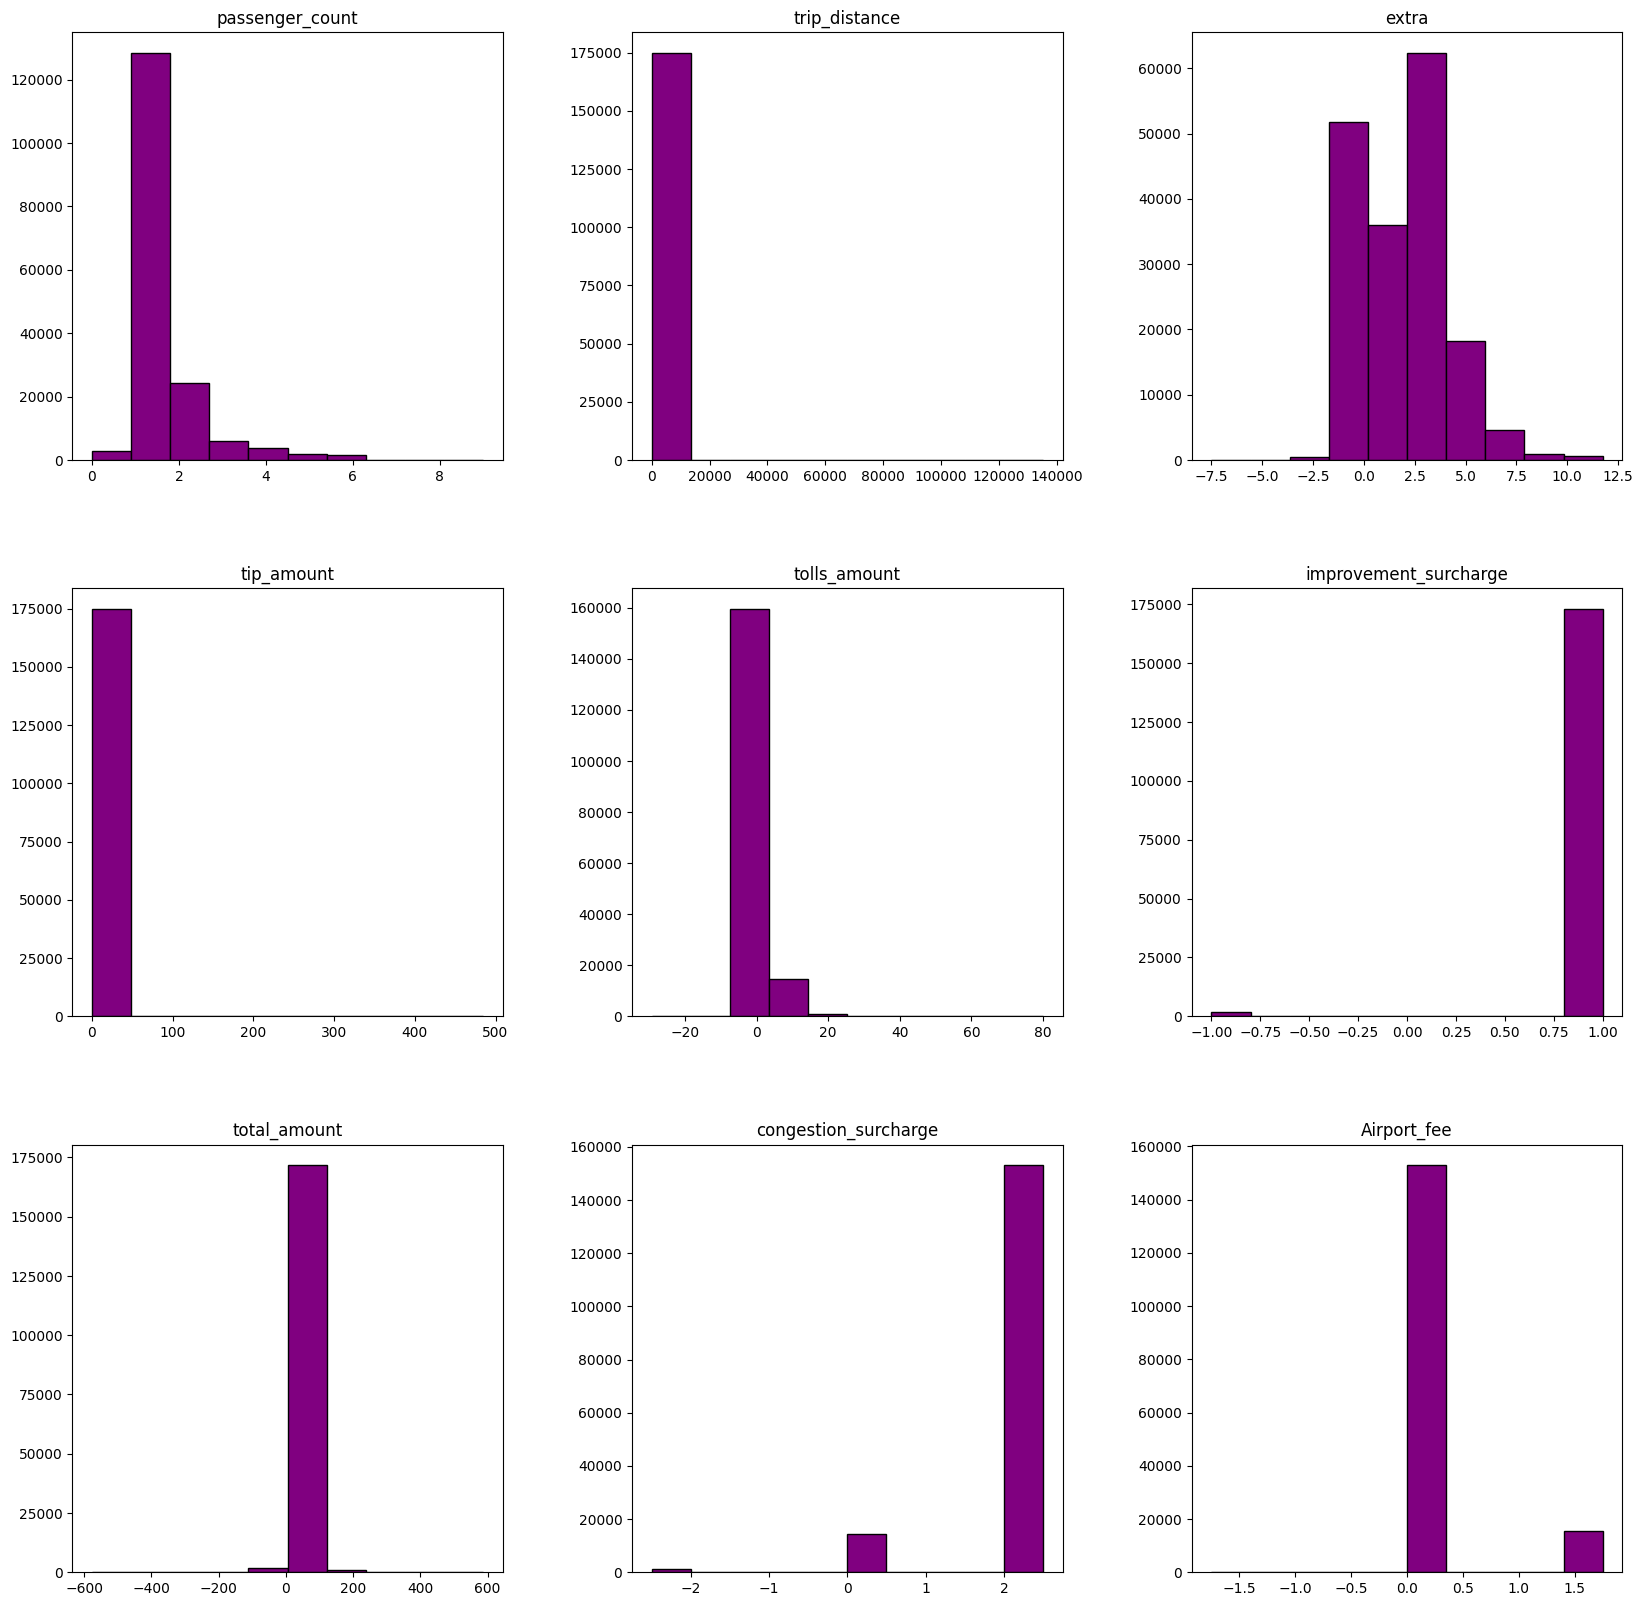

In [13]:
#VISUALIZE THE DISTRIBUTION OF THE DATA
train_1.hist(figsize=[20,20],grid=False,edgecolor="black",bins=10,color="purple");


> _Observe that, the most of the features shows skewness. To visualize the skew and outliers, boxplots are used._

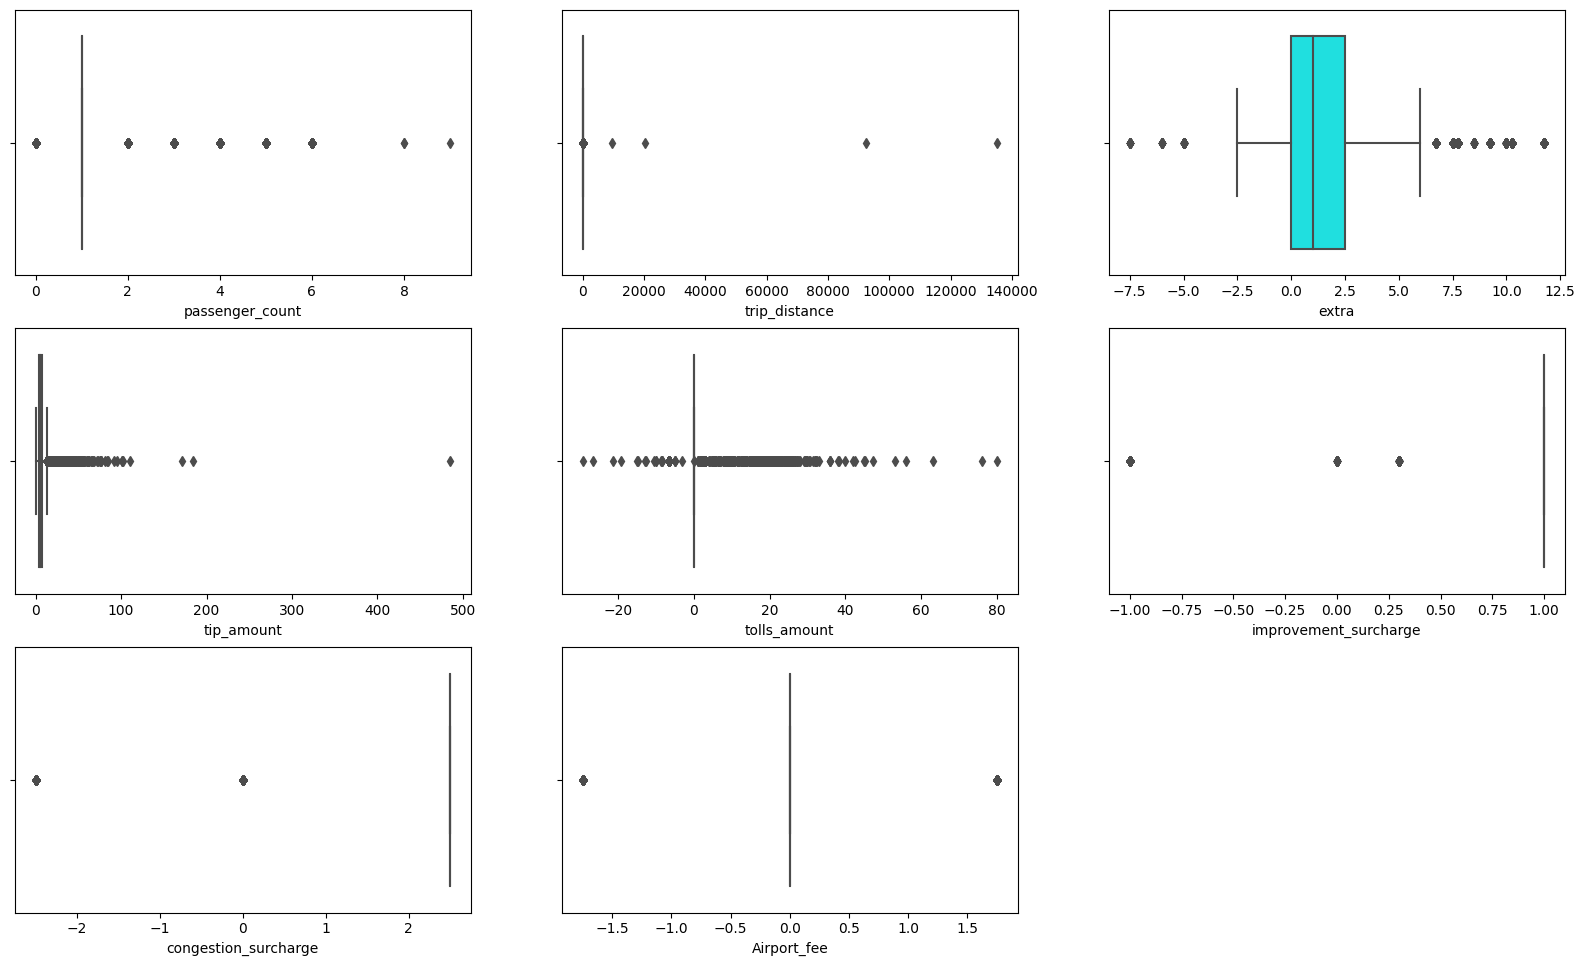

In [14]:
#UNDERSTANDING THE SKEWNESS
plt.figure(figsize=[20,20])
count=1
for col in numeric:
    plt.subplot(5,3,count)
    sns.boxplot(data=train_1,x=col,color="cyan")
    plt.xlabel=col
    count+=1

> The data set is shows very high skewness for some features. The surcharges and airport fee take discrete values. 

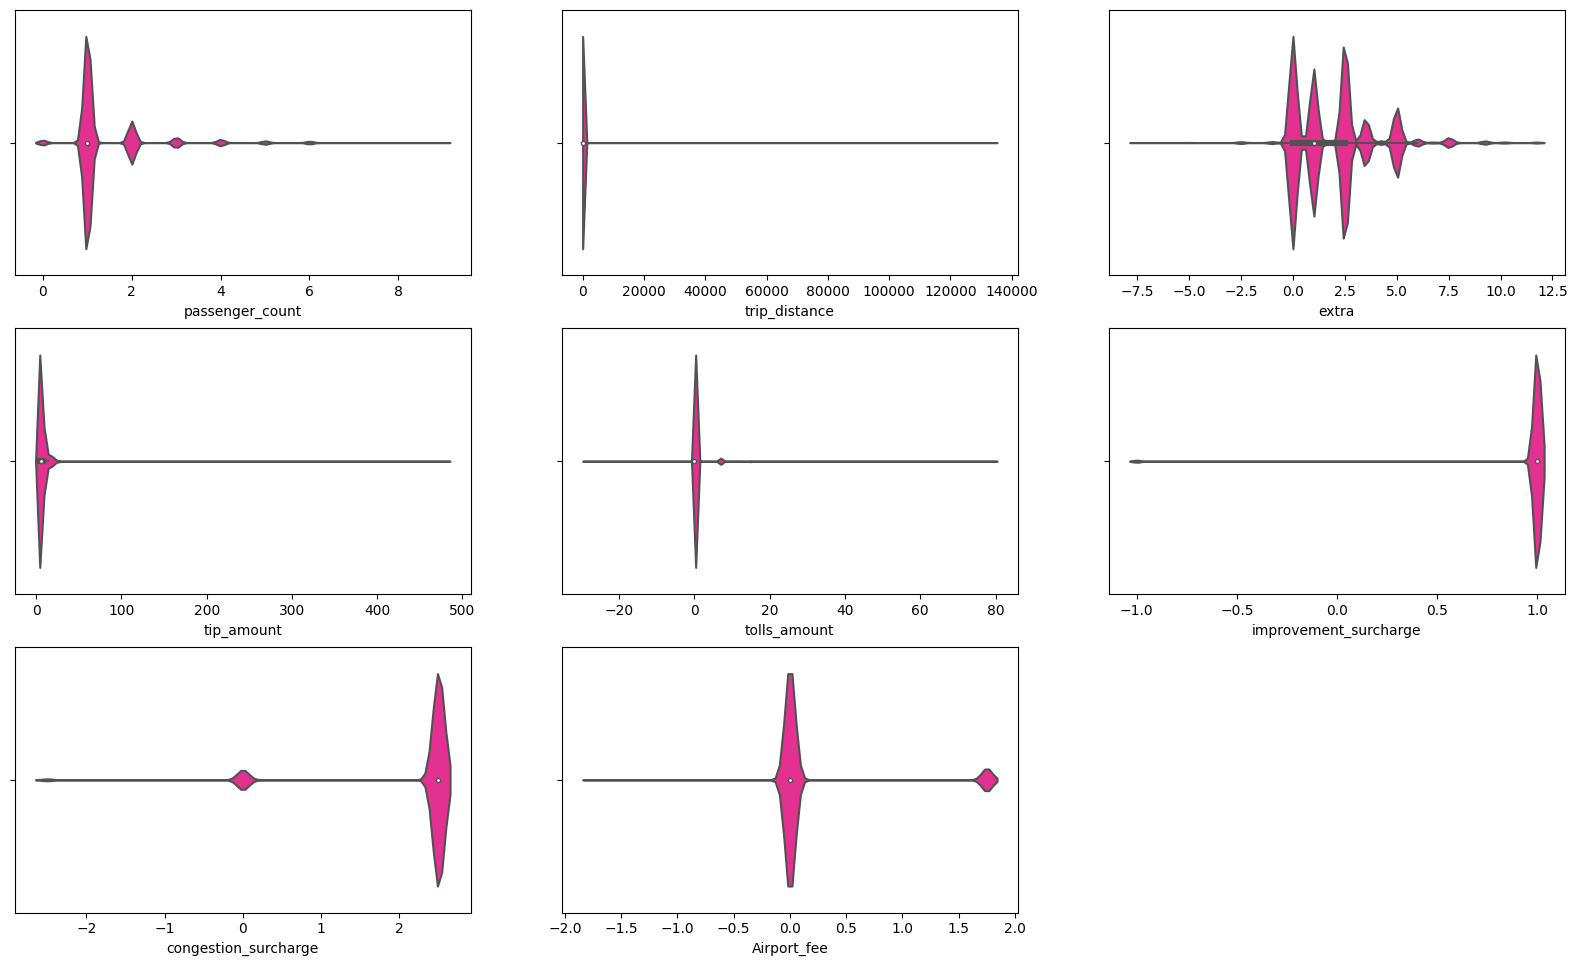

In [15]:
#VISAULIZING THE SAME USING VIOLINPLOT
plt.figure(figsize=[20,20])
count=1
for col in numeric:
    plt.subplot(5,3,count)
    sns.violinplot(data=train_1,x=col,color="deeppink")
    plt.xlabel=col
    count+=1


> passesnger_count is right skewed with a higher density for passenger count equal to 1.

> trip_distance shows the most skew, with few outlier points.

> The extra amount is slightly skewed. It shows mulimodal nature.

> tip_amount is skewed to the right. Most of the tip amount lie below 100, with a few outlier values above it.

> tolls_amount has a left tail and a longer right tail, the left tail is due to the negative toll amount. This negative amount could be rationalized to refund or discounts or worst cases error in the system. It can also be noted that the 25th, 50th anf 75th quartiles are aligned to 0.

> imporovement_surcharge also shows a left skew, here the highest density is for surcharge one, infact the 25th, 50th, 75th, max is at 1. The lowest surcharge value is -1, again this could be attributed to refund or discounts.

> A similar trend is also observed for congestion_surcharge.

> Airport_fee' s box plot looks symmetric in nature, the violin plot shows a slight peak at 1.75. Here the symetric nature is because the all the 3 quartiles overlap.

In [16]:
train_1.describe()

,passenger_count,trip_distance,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,1.357678,5.145930,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.891283,394.971052,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,1.000000,1.080000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.840000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,3.610000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,9.000000,135182.060000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [17]:
print("-----------------------------------------")
for col in numeric:
    print(f"{col} | Skew = {train_1[col].skew().round(3)}")
print("-----------------------------------------")
print(f"trip_distance is skewed most to the right and improvement surcharge is skewed most to the left. This is further understood from the describe table above, the  difference between the third quartile and maximum of the feature is large.")

-----------------------------------------
passenger_count | Skew = 2.874
trip_distance | Skew = 302.833
extra | Skew = 1.094
tip_amount | Skew = 9.432
tolls_amount | Skew = 5.124
improvement_surcharge | Skew = -9.787
congestion_surcharge | Skew = -3.32
Airport_fee | Skew = 2.664
-----------------------------------------
trip_distance is skewed most to the right and improvement surcharge is skewed most to the left. This is further understood from the describe table above, the  difference between the third quartile and maximum of the feature is large.


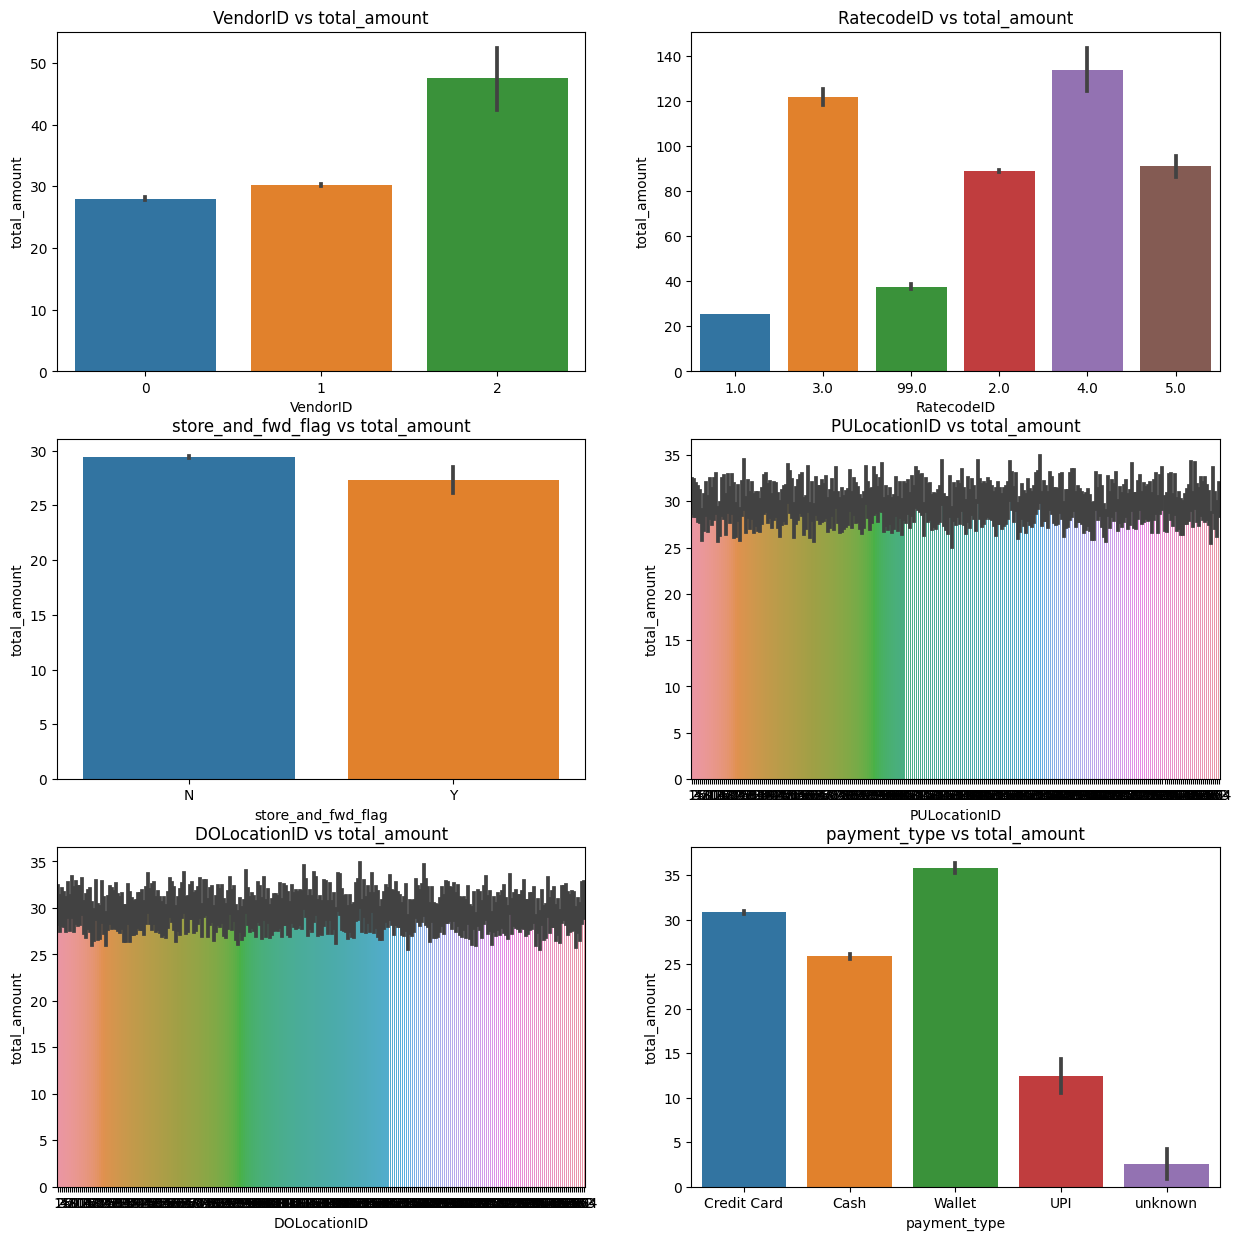

In [18]:
#VISUALIZE THE CATEGORIC DATA AGAINST TOTAL AMOUNT
count=1
plt.figure(figsize=[15,15])
for col in categoric:
    plt.subplot(3,2,count)
    sns.barplot(data=train_1,x=col,y="total_amount")
    plt.title(f"{col} vs total_amount")
    count+=1
    
    

> Observe that the total amount against location IDs are uniform


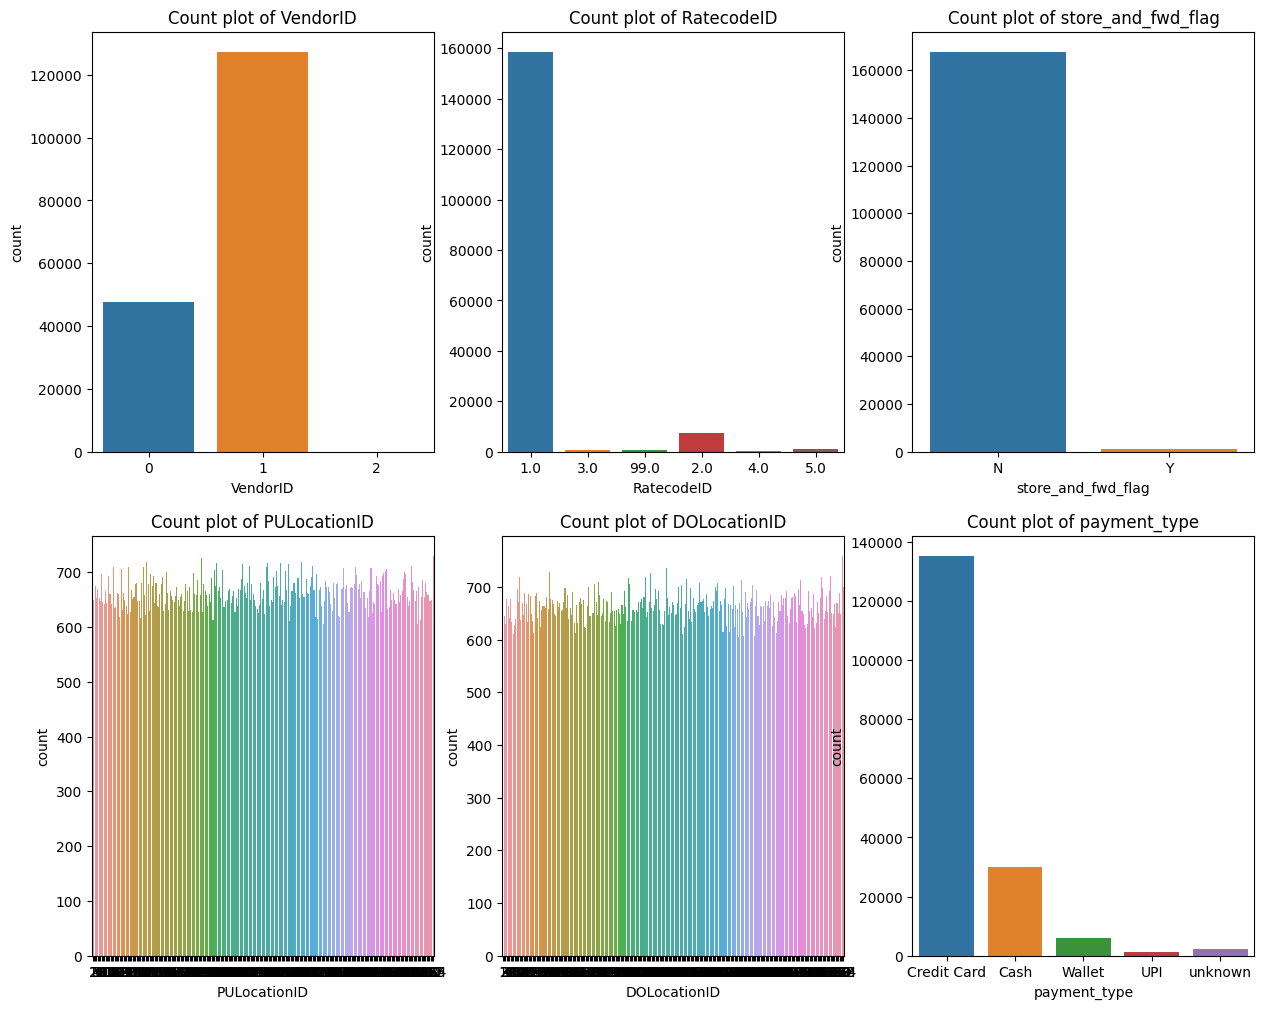

In [19]:
#Visualize the categoric features
count=1
plt.figure(figsize=[15,12])
for col in categoric:
    plt.subplot(2,3,count)
    sns.countplot(data=train_1,x=col)
    plt.title(f"Count plot of {col}")
    count+=1
    

> We arrive at the following observations:

> The Vendor 2 has low no: of sampeles, but high contibution to total amount, this could be because Vendor 2 is a premium taxi provider.

> Similar trend is observed for Ratecode ID , ratecodeID 1 has low total amount contirbution that to its count, this could be because, ID 1 could be a standard route, and hence standard rate. A vice versa trend is seen for ID 4 , this rate could be associated with premium routes, infact closer inspection showed that rate code ID 4, has the highest airport fee.

> Similar trend is seeen for store_fwd_flag, here the possible explanations is, services with continous internet services could be pricier than others.

> In case of payments, credit payment is the most common, despite this the lower total amount could be explained as; this mode is the routine mode of payment for day to day commute. Whereas wallets could be associated with premium rides.

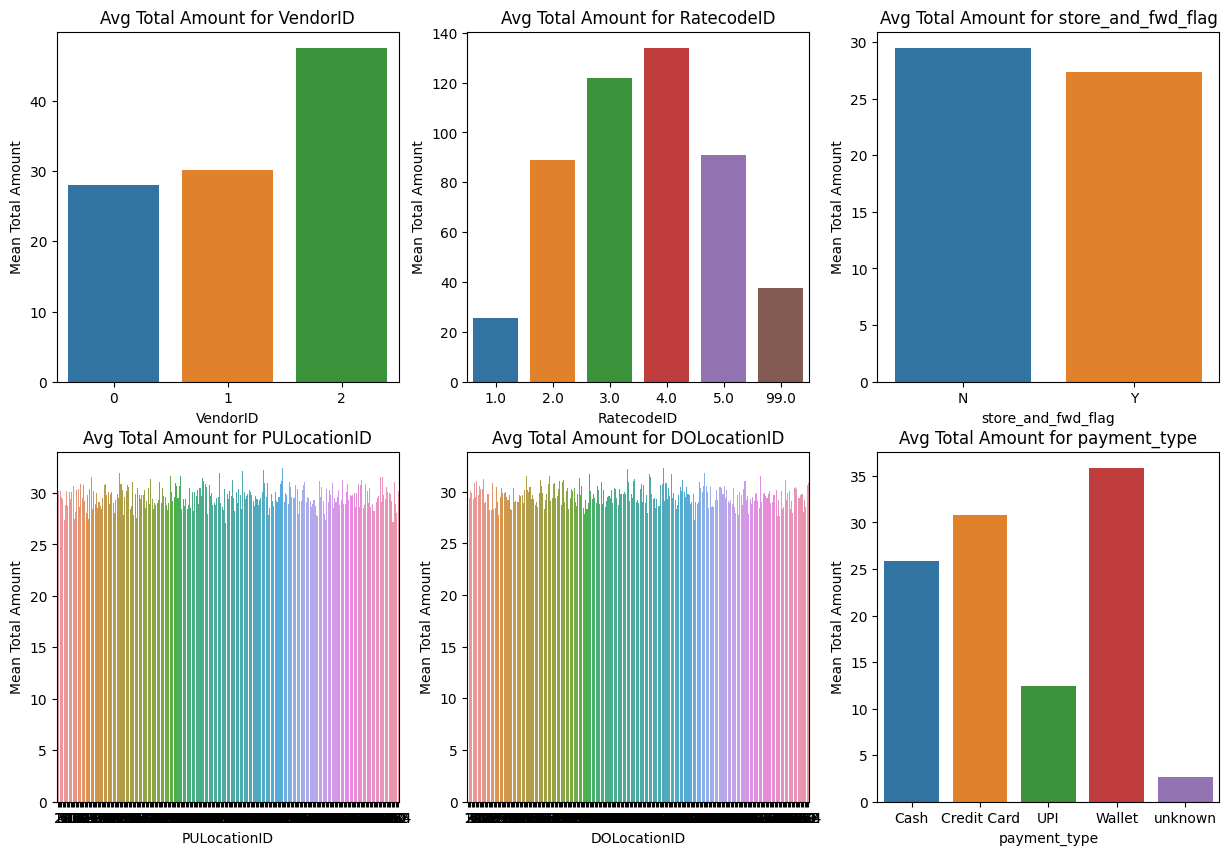

In [20]:
# plotting the average total by categoric
count = 1
plt.figure(figsize=(15, 10))  

for col in categoric:
    plt.subplot(2, 3, count)
    data = train_1.groupby(col)["total_amount"].mean().reset_index()
    sns.barplot(data=data, x=col, y="total_amount")
    plt.ylabel("Mean Total Amount")
    plt.title(f'Avg Total Amount for {col}')
    count += 1


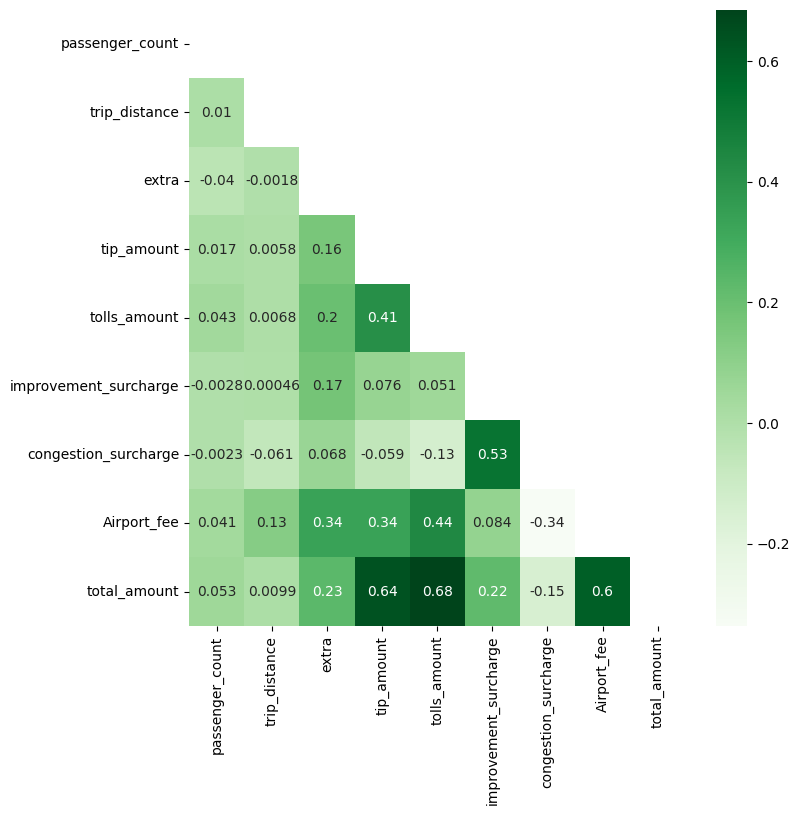

In [21]:
#Correlation Analysis
corr_matrix=train_1[numeric+['total_amount']].corr()
plt.figure(figsize=[8,8])
triangle = np.triu(np.ones_like(corr_matrix), k=0) #K=0 DO NOT SHOW THE DIAGONAL, K=1 SHOW THE DIAGONAL
sns.heatmap(data=corr_matrix,annot=True,mask=triangle,cmap="Greens");

> None of the numerical features show a correlation greater than 0.7. So it is reasonable to use these features for modelling.

# 5.Feature Engineering 🛠️🔩✂️ 

###  5.1 Feature Engineering on Pickup Datetime and Dropoff Datetime Feature 

> **Pickup and Dropoff column**:
>* Change the date feature type to datetime
>* Extract hour, month, day
>* Create weekend or weekday feature
>* Create time travelled in seconds feature
>>  * Replace negative travel time and travel time less than a minute  with NaN

In [22]:
#Change the date time tp datetime type
train_1['tpep_pickup_datetime']=pd.to_datetime(train_1['tpep_pickup_datetime'])
train_1['tpep_dropoff_datetime']=pd.to_datetime(train_1['tpep_dropoff_datetime'])

#Extract hour, month, day
train_1["pickup_hour"]=train_1['tpep_pickup_datetime'].dt.hour
train_1['dropoff_hour']=train_1['tpep_dropoff_datetime'].dt.hour
train_1["month"]=train_1["tpep_pickup_datetime"].dt.month
train_1["day"]=train_1["tpep_pickup_datetime"].dt.strftime("%A")

#Create weekend or weekday feature
train_1['weekend/weekday'] = train_1["tpep_pickup_datetime"].dt.dayofweek.apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
train_1["month"]=train_1["month"].astype("object")

#Create time travelled in seconds feature
train_1["time_travelled"]=train_1["tpep_dropoff_datetime"]-train_1["tpep_pickup_datetime"]
time=[]
for i in range(len(train_1)):
    if train_1["time_travelled"][i].days<0:
        time.append(np.NaN)
    else:
        time.append(train_1["time_travelled"][i])
train_1["travel_time"]=time
train_1["travel_time_sec"]=train_1["travel_time"].dt.total_seconds().round(2)

#assume a  postive travel time 
train_1['travel_time_sec'].replace(0, np.NaN, inplace=True)


#Repeat the same on test
test_1['tpep_pickup_datetime']=pd.to_datetime(test_1['tpep_pickup_datetime'])
test_1['tpep_dropoff_datetime']=pd.to_datetime(test_1['tpep_dropoff_datetime'])
test_1["pickup_hour"]=test_1['tpep_pickup_datetime'].dt.hour
test_1['dropoff_hour']=test_1['tpep_dropoff_datetime'].dt.hour
test_1["month"]=test_1["tpep_pickup_datetime"].dt.month
test_1["day"]=test_1["tpep_pickup_datetime"].dt.strftime("%A")
test_1['weekend/weekday'] = test_1["tpep_pickup_datetime"].dt.dayofweek.apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
test_1["month"]=test_1["month"].astype("object")
test_1["time_travelled"]=test_1["tpep_dropoff_datetime"]-test_1["tpep_pickup_datetime"]
time=[]
for i in range(len(test_1)):
    if test_1["time_travelled"][i].days<0:
        time.append(np.NaN)
    else:
        time.append(test_1["time_travelled"][i])
test_1["travel_time"]=time
test_1["travel_time_sec"]=test_1["travel_time"].dt.total_seconds().round(2)
test_1['travel_time_sec'].replace(0, np.NaN, inplace=True)



###  5.2 Feature Engineering on Passenger Count Feature 

In [23]:
train_1['passenger_count'].value_counts()

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

> **Passenger Count**: Replace the passenger count greater than 7 and 0 with NaN.

In [24]:
train_1.loc[(train_1['passenger_count'] > 7) |(train_1['passenger_count'] < 1 ), 'passenger_count'] = np.NaN

test_1.loc[(test_1['passenger_count'] > 7) |(test_1['passenger_count'] < 1 ), 'passenger_count'] = np.NaN

###  5.3 Feature Engineering to Explain the Negative Values in Total Amount 

<Axes: xlabel='total_amount'>

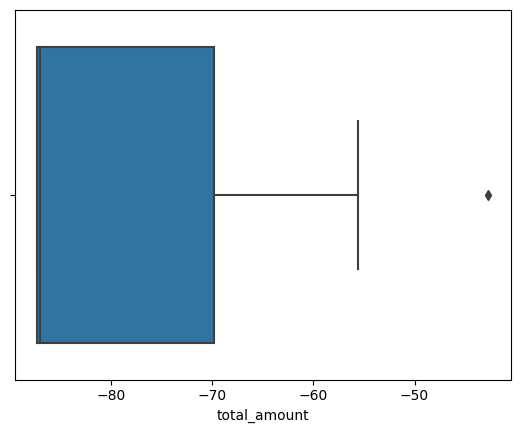

In [25]:
#TO EXPLAIN FOR THE NEGATIVE TOTAL AMOUNT
check=train_1[(train_1["improvement_surcharge"] <0) & (train_1["congestion_surcharge"] < 0) & (train_1["extra"] <0) & (train_1["Airport_fee"] <0) & (train_1["tolls_amount"] <0)]
sns.boxplot(data=check,x="total_amount")

> It is observed that the total amount is negative when 
>1. imporevement surcharge
>2. congestion surcharge
>3. extra 
>4. tolls amount
>5. airport fee are negative. So we create a **refund** feature to explain for the negative total amount.

In [26]:
#define the function
def refund(row):
    return 1 if (row["improvement_surcharge"] <0) and (row["congestion_surcharge"] < 0) and (row["extra"] <0) and (row["Airport_fee"] <0) and (row["tolls_amount"] <0)else 0

train_1['refund'] = train_1.apply(refund, axis=1)

test_1['refund'] = test_1.apply(refund, axis=1)

###  5.4 Feature Engineering on Trip Distance Feature 

> To reduce the skew in **trip distance**, we follow the procedure given below
>* Create a trip pair feature using the pickup and drop off IDs.This is the location pair between which the trip happened.
>* Group the trip distance by the trip pair using median strategy.
>* Replace the trip distance greater than 1000 by using comparing with the median distance of the trip pair.
>* For the trip distance 0.0, we go by the assumption that those could be distances that were not registered do to error in device.

In [27]:
#Create trip pair
train_1['trip_pair'] = train_1.apply(lambda row:f"{min(row['PULocationID'],row['DOLocationID'])},{max(row['PULocationID'],row['DOLocationID'])}", axis=1)

#group the trip distance by trip pair
dis_median=train_1.groupby("trip_pair")["trip_distance"].median()
dis_median_dict = dis_median.to_dict()


#define a function to repalce the distance for train
def replace_trip_distance_tr(row):
    if row['trip_distance'] > 1000:
        trip_pair = row['trip_pair']
        if trip_pair in dis_median_dict:
            return dis_median_dict[trip_pair]
    return row['trip_distance']


#repalace distance greater than 1000
train_1['trip_distance'] = train_1.apply(replace_trip_distance_tr, axis=1)


test_1['trip_pair'] = test_1.apply(lambda row:f"{min(row['PULocationID'],row['DOLocationID'])},{max(row['PULocationID'],row['DOLocationID'])}", axis=1)
dis_median_test=test_1.groupby("trip_pair")["trip_distance"].median()
dis_median_test_dict = dis_median_test.to_dict()
def replace_trip_distance_test(row):
    if row['trip_distance'] > 1000:
        trip_pair = row['trip_pair']
        if trip_pair in dis_median_test_dict:
            return dis_median_test_dict[trip_pair]
    return row['trip_distance']

test_1['trip_distance'] = test_1.apply(replace_trip_distance_test, axis=1)

### 5.5 Trip Pair Frequency Feature 

> To check if the **frequency of the trip pair** is significant for total amount prediction
>* Create a new trip_pair frequency feature by mapping the frequency of each trip pair


In [28]:
trip_pair_count_train=train_1["trip_pair"].value_counts() # create frequency count for each trip pair
train_1["trip_pair_frequency"]=train_1["trip_pair"].map(trip_pair_count_train)
trip_pair_count_test=test_1["trip_pair"].value_counts()
test_1["trip_pair_frequency"]=test_1["trip_pair"].map(trip_pair_count_test)

In [29]:
num=list(train_1.select_dtypes(exclude=["object","datetime64[ns]","timedelta64[ns]"]).columns)
obj=list(train_1.select_dtypes(include=["object"]).columns)
num.remove("total_amount")

### 5.6 Removing Outliers

In [30]:
#num_outlier=["trip_distance","tip_amount","travel_time_sec"]

#def remove_outlier(df,column,multiplier):
#    Q1 = df[column].quantile(0.25)
#    Q3 = df[column].quantile(0.75)
#    IQR = Q3 - Q1
    
#    lower_bound = Q1 - multiplier * IQR
#    upper_bound = Q3 + multiplier * IQR
    
#    df[column]=np.where((df[column]<lower_bound)|( df[column]>upper_bound),np.NaN,df[column])
#    return df

#for column in num_outlier:
 #   train_1_nw = remove_outlier(train_1, column, 2)
  #  test_1_nw=remove_outlier(test_1,column,2)

> Separately removing the outliers further from feature engineering steps done so far, showed a decrease in validation scores. Hence we will not doing any explicit outlier removal, but we address only those that were replaced to NaN in the feature engineering steps.

### 5.7 Checks for Feature Significance 

In [31]:
#Statistical- Spearman correltion for numeric
alpha=0.05
for col in num:
    corr_coef,p=spearmanr(train_1[col],train["total_amount"])
    if p<alpha:
        print(f"the {col} is significant" )
    else:
        print(f"the {col} is insignificant" )



the passenger_count is insignificant
the trip_distance is significant
the extra is significant
the tip_amount is significant
the tolls_amount is significant
the improvement_surcharge is significant
the congestion_surcharge is insignificant
the Airport_fee is insignificant
the pickup_hour is significant
the dropoff_hour is significant
the travel_time_sec is insignificant
the refund is significant
the trip_pair_frequency is insignificant


> Note: The insignificant features other than trip_pair_frequency have missing values that are to be imputed.

In [32]:
#Statiscal- fAnova for numerical and categorical

alpha=0.05
for col in obj:
    group=train_1.groupby(col)["total_amount"].apply(list)
    p_value=f_oneway(*group)
    if p_value[1]<alpha:
        print(f"the {col} is significant" )
    else:
        print(f"the {col} is insignificant" )

the VendorID is significant
the RatecodeID is significant
the store_and_fwd_flag is significant
the PULocationID is insignificant
the DOLocationID is insignificant
the payment_type is significant
the month is insignificant
the day is significant
the weekend/weekday is insignificant
the trip_pair is insignificant


> It is noted that trip_pair_frequency is not significant, to assert this we visualize by a plot.

<Axes: xlabel='trip_pair_frequency', ylabel='total_amount'>

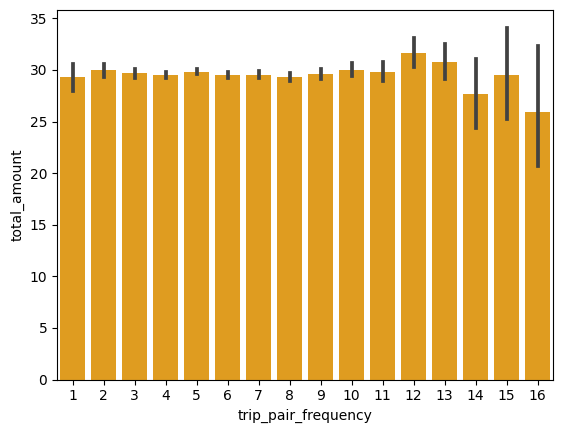

In [33]:
sns.barplot(data=train_1,x="trip_pair_frequency",y="total_amount",color="orange")

In [34]:
print("correlation between trip_pair_frequency and total amount")
print("--------------------------------------------------------")
print(train_1["trip_pair_frequency"].corr(train_1["total_amount"],method="spearman"))

correlation between trip_pair_frequency and total amount
--------------------------------------------------------
0.0007376080359816108


> We note that the distribution of total amount for each trip_pair_frequency is almost uniform and has significant low correlation. 

In [35]:
label=train_1[["total_amount"]]


> Removing the columns that do not show any significance and total_amount
>* tpep_pickup_datetime
>* tpep_dropoff_datetime
>* PULocationID
>* DOLocatioID
>* time_travelled
>* travel_time
>* trip_pair
>* store_and_fwd_flag
>* total_amount
>* trip_pair_frequency

>* We consider on pickup hour as for some samples the dropoff hour was given to be lesser than pickup. Instead we consider the hour of pickup and travel time in seconds and not the dropoff hour.


In [36]:
train_copy=train_1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime',"PULocationID","DOLocationID",'time_travelled', 'travel_time',"trip_pair","total_amount","trip_pair_frequency","dropoff_hour","store_and_fwd_flag"],axis=1)
test_copy=test_1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime',"PULocationID","DOLocationID",'time_travelled', 'travel_time',"trip_pair","trip_pair_frequency","dropoff_hour","store_and_fwd_flag"],axis=1)





> Note: we now have 18 columns to work with. Out of which 6 columns have null values that has to be imputed.

# 6. Data Preprocessing 🧹🧽

### 6.1 Split the Data 

In [37]:
#split the data
from sklearn.model_selection import train_test_split
train_data,val_data,y_train,y_val=train_test_split(train_copy,label,test_size=0.2,shuffle=True,random_state=100)


### 6.2 Date Preprocessing
#### - imputation of missing values and encodings

>* Use iterative imputer on numerical columns with null values
>* Use simple imputer with mode strategy for categorical variables
>* Transform the categorical variables to numerical type using one hot encoder and ordinal encoding

In [38]:
#columns
num1=['passenger_count','congestion_surcharge', 'Airport_fee',"travel_time_sec"]
imp_oh = ['RatecodeID']
or_wday_end=["weekend/weekday"]
oh_others = ["VendorID","month","day","payment_type"]


#imputation strategies
numerical_iter_imputer = IterativeImputer(max_iter=20, initial_strategy='median',random_state=1) # for num1
categorical_imputer = SimpleImputer(strategy="most_frequent",missing_values=np.NaN) #for imp_oh_ratecode
ord_enc_wday_wend=OrdinalEncoder(categories=[["Weekday","Weekend"]]) #for or_wday_end
one_hot = OneHotEncoder(sparse_output=False,handle_unknown="ignore") #oh_others


#pipeline
cat_pipeline1 = Pipeline(steps=[("categorical_imputer", categorical_imputer),("oh_ratecode",one_hot)])

#combining the steps
prep=ColumnTransformer(transformers=[("num_1",numerical_iter_imputer,num1),("cat_pipe",cat_pipeline1,imp_oh),("ord_1",ord_enc_wday_wend,or_wday_end),("oh1",one_hot,oh_others)],remainder="passthrough")

prep.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_1',
                                 IterativeImputer(initial_strategy='median',
                                                  max_iter=20, random_state=1),
                                 ['passenger_count', 'congestion_surcharge',
                                  'Airport_fee', 'travel_time_sec']),
                                ('cat_pipe',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oh_ratecode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['RatecodeID']),
                                ('ord_1',
                                 OrdinalEncoder(categories=[['Weekday',
                                                             'Weekend']]),
                                 ['weekend/weekday']),
                                ('oh1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['VendorID', 'month', 'day', 'payment_type'])])

In [39]:
#train data
data_train=prep.fit_transform(train_data)
#val data
data_val=prep.transform(val_data)


# 7.Training ML Models 💻👩‍💻

The broad strategy that is going to be used to identify thr best model is as given:
> Fit the data on 11 different models with default parameters to identify the top 5 models using R2 score as the metric. 
> Use hyperparameter tunining on the selected models.
> Compare the R2 scores to choose the best model.


> We will consider the following estimators.
>* LinearRegressor
>* Ridge
>* Lasso
>* ElasticNet
>* RandomForestRegressor
>* GradientBoositngRegressor
>* ExtraTreesRegressor
>* KNeighboursRegressor
>* DecisionTreeRegressor
>* LGBMRegressor
>* XGBRegressor





In [40]:
estimators={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso": Lasso(),
    "ElasticNet":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(random_state=1),
    "GradientBoostingRegressor":GradientBoostingRegressor(random_state=1),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(random_state=1),
    "xgb":xgb.XGBRegressor(random_state=1),
    "lgb":lgb.LGBMRegressor(random_state=1),
    "ExtraTreesRegressor":ExtraTreesRegressor(random_state=1)
    }    


In [41]:
#each of the estimators are fitted on the train data and predicted on both train and validation.
#eval_r2_train=[]
#eval_r2_val=[]

#for model,estimator in estimators.items():
 #   estimator.fit(data_train,np.ravel(y_train))
  #  prediction_train=estimator.predict(data_train)
   # r2_train=r2_score(y_train,prediction_train)
   # eval_r2_train.append(r2_train)

    
#for model,estimator in estimators.items():
 #   prediction_test=estimator.predict(data_val)
  #  r2_val=r2_score(y_val,prediction_test)
   # eval_r2_val.append(r2_val)

In [42]:
#eval_df=pd.DataFrame({"estimator":estimators.keys(),"train_score":eval_r2_train,"test_score":eval_r2_val})
#eval_df=eval_df.sort_values(by="test_score",ascending=False)
#plot=eval_df.plot(x="estimator",y=["train_score","test_score"],kind="bar",figsize=[7,3],color=["red","lightgreen"],edgecolor="black")
#plot.set_ylim(0,1.2);
#plt.ylabel("score");
#plt.title("Comparison of Train and Test Scores of Different Estimators");




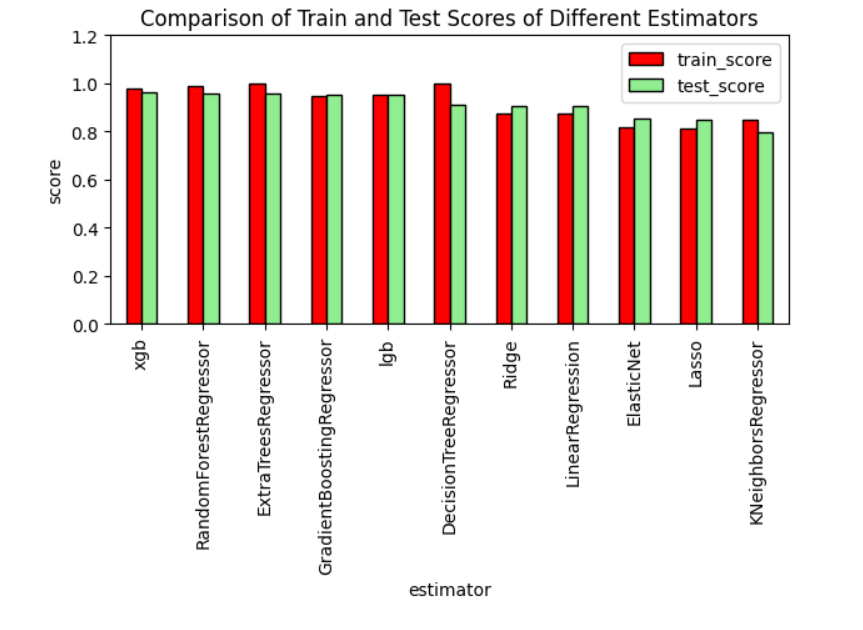

> The dataframe of train scores and validation scores against each model is given below

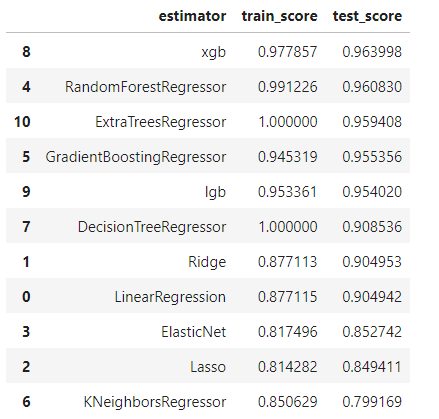

>On comparison of test scores, the top 5 estimators chosen for further modelling are:
>* xgb
>* ExtraTreesRegressor
>* RandomForestRegressor
>* GradientBoostingRegressor
>* lgb

> Next, for each of the 5 estimators, we identify the most important features using feature_importance.

In [43]:
rf_reg=RandomForestRegressor(random_state=1)
gb_reg=GradientBoostingRegressor(random_state=1)
xgb_reg=xgb.XGBRegressor(random_state=1)
lgb_reg=lgb.LGBMRegressor(random_state=1)
et_reg=ExtraTreesRegressor(random_state=1)   

# 8. XGBoost 1️⃣

### 8.1 Feature Selection

> For feature selection, we use the following strategy,
- choose the subset of features that has feature score greater than 0


In [44]:
xgb_reg.fit(data_train,y_train)
score_xgb=xgb_reg.get_booster().get_fscore()
print(pd.DataFrame({"Feature":score_xgb.keys(),"Score":score_xgb.values()}))

                             Feature   Score
0             num_1__passenger_count   227.0
1        num_1__congestion_surcharge   169.0
2                 num_1__Airport_fee   102.0
3             num_1__travel_time_sec   531.0
4           cat_pipe__RatecodeID_1.0    93.0
5           cat_pipe__RatecodeID_2.0    99.0
6           cat_pipe__RatecodeID_3.0    37.0
7           cat_pipe__RatecodeID_4.0    68.0
8           cat_pipe__RatecodeID_5.0   233.0
9          cat_pipe__RatecodeID_99.0    34.0
10            ord_1__weekend/weekday     4.0
11                   oh1__VendorID_0    49.0
12                   oh1__VendorID_1     8.0
13                   oh1__VendorID_2     7.0
14                   oh1__day_Friday    49.0
15                 oh1__day_Thursday    59.0
16                oh1__day_Wednesday    33.0
17            oh1__payment_type_Cash    35.0
18     oh1__payment_type_Credit Card    46.0
19             oh1__payment_type_UPI    29.0
20          oh1__payment_type_Wallet    40.0
21        

> It is noted that the columns

> oh1__month_6

> oh1__month_7

> oh1__day_Saturday

> are of importance less than zero hence ignored


In [45]:
selected_features_xgb=score_xgb.keys()
#print(list(selected_features_xgb))

> Having explicitely chosen the features, we will now hypertune the best parameters.

> Note: HPT as it is a repeated process, not all code blocks are given.


> The hyperparameter values can be accessed her
> [HyperParameterTuning-XGB](https://docs.google.com/spreadsheets/d/19wRk9O1LmWgLqupz6hlhRN3In_nPdjjK1m4zIYDcHo8/edit?usp=sharing)

### 8.2 Hyper Parameter Tuning



In [46]:
#define the parameter grid #GRIDSEARCHCV
param={"learning_rate":[0.101003],"n_estimators":[281,283,285],"max_depth":[5]}
gs_xgb=GridSearchCV(xgb_reg,param_grid=param,scoring="r2",n_jobs=-1,cv=3,verbose=1,return_train_score=True)

#fit the model to the gridsearch
gs_xgb.fit(data_train[selected_features_xgb],y_train)

#view the grid search results
#pd.DataFrame(gs_xgb.cv_''results_)
print(gs_xgb.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'learning_rate': 0.101003, 'max_depth': 5, 'n_estimators': 285}


### 8.3 Prediction using the Model

In [47]:
#using the parameters obtained to train the model
xgb_reg.set_params(max_depth=5,learning_rate=0.101003,n_estimators=285)
xgb_reg.fit(data_train[selected_features_xgb],y_train)

#prediction -train data
y_pred_xgb=xgb_reg.predict(data_train[selected_features_xgb])
r2_train=r2_score(y_train,y_pred_xgb)
print(f"train score: {r2_train}")

#prediction-validation_data
y_pred_xgb_t=xgb_reg.predict(data_val[selected_features_xgb])
r2_val=r2_score(y_val,y_pred_xgb_t)
print(f"test score: {r2_val}")


train score: 0.9716856858503041
test score: 0.9654976410385182


### 8.4 Model Evaluation

In [48]:
#cross validation
cv_xgb = cross_val_score(xgb_reg, data_train[selected_features_xgb],y_train, cv=5,scoring='r2')
print(f"cv-scores: {cv_xgb}")
print(f"Mean 5-Fold R Squared: {np.mean(cv_xgb)}\nstdev 5-Fold R Squared: {np.std(cv_xgb)}")


cv-scores: [0.9411215  0.95134313 0.9485564  0.92697984 0.95960151]
Mean 5-Fold R Squared: 0.9455204764735227
stdev 5-Fold R Squared: 0.010995472674156891


> We plot the actual vs predicted plots and residual plots to see the quality of prediction.

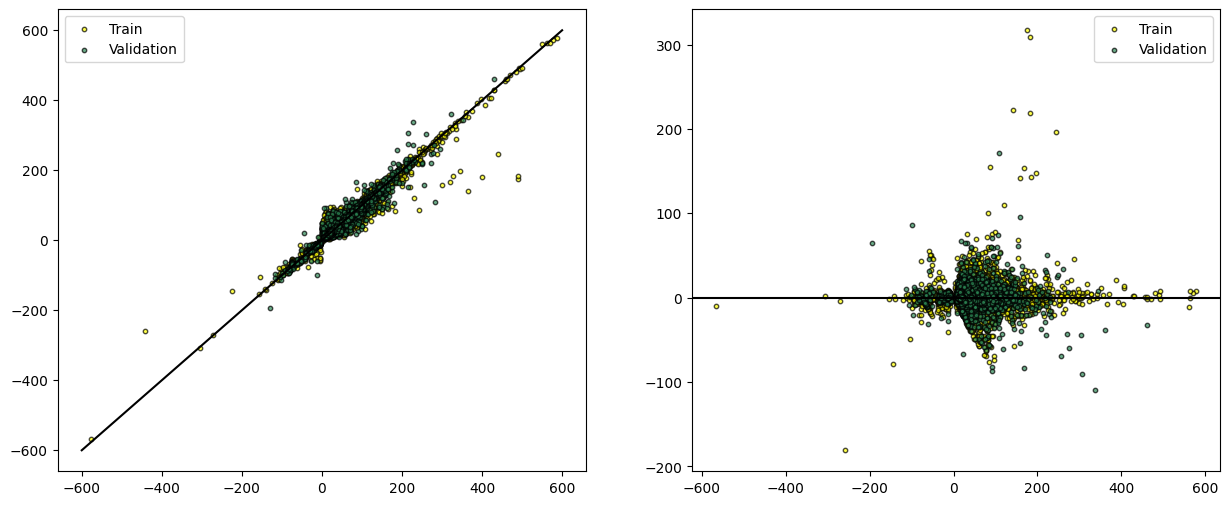

In [49]:
#actual vs predicted plot

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_xgb,s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_val,y_pred_xgb_t,s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.plot(np.linspace(-600,600),np.linspace(-600,600),color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Actual")
#plt.ylabel("Predicted")


#residual plot
plt.subplot(1,2,2)
plt.scatter(y_pred_xgb,(y_train.values.reshape(1,-1)-y_pred_xgb),s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_pred_xgb_t,(y_val.values.reshape(1,-1)-y_pred_xgb_t),s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.axhline(color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Residual")
#plt.ylabel("Predicted")


# 9. RandomForestRegressor 2️⃣

### 9.1 Feature Selection and HPT

> For feature selection we will use feature importance. 

> The hyperparameters will also be determined in using RandomizedSearchCV

In [50]:
#ROUND 1: manuel
#rf_reg.set_params(n_estimators=300,criterion='squared_error',max_depth=7,max_features=0.7)
#train score: 0.9400908316464903
#test score: 0.9307249680026379

#ROUND 2: manuel
#for n in [0.5,0.6,0.7,0.8,0.9]:
#rf_reg.set_params(n_estimators=303,criterion='squared_error',max_depth=7,max_features=n)
# best param=0.6
#train score: 0.9399635835939955
#test score: 0.9314659044707425

#ROUND 3
#param = {
    #"n_features_to_select": [24, 25, 26, 27, 28, 29, 30],
    #"estimator__n_estimators": randint(298, 310),
    #"estimator__max_depth": randint(5, 7),
    #"estimator__max_features": [0.6, 0.7]}


#rf_rfe = RFE(estimator=rf_reg)# define the RFE estimator with rf_reg as the base estimator
#rf_rs = RandomizedSearchCV(rf_rfe, param_distributions=param, n_iter=10, scoring="r2", n_jobs=-1,verbose=2)
#best_params: {'estimator__max_depth': 6, 'estimator__max_features': 0.7, 'estimator__n_estimators': 308, 'n_features_to_select': 30}


In [51]:
rf_reg.fit(data_train,np.ravel(y_train))
feature_imp_rf=rf_reg.feature_importances_
feature_imp_rf_df=pd.DataFrame({"Features":data_train.columns,"Importance":feature_imp_rf}).sort_values(by="Importance",ascending=False)
feature_imp_rf_df


,Features,Importance
25,remainder__trip_distance,0.763584
29,remainder__improvement_surcharge,0.080209
27,remainder__tip_amount,0.071781
4,cat_pipe__RatecodeID_1.0,0.016984
28,remainder__tolls_amount,0.012374
3,num_1__travel_time_sec,0.008528
30,remainder__pickup_hour,0.008357
8,cat_pipe__RatecodeID_5.0,0.007043
5,cat_pipe__RatecodeID_2.0,0.006387
26,remainder__extra,0.004838


### 9.2 Prediciton using the Model

In [52]:
selected_features_rf=feature_imp_rf_df.iloc[:30,0]
# we fit the model using the parameters obtained
rf_reg.set_params(max_depth=6,max_features=0.7,n_estimators=308)
rf_reg.fit(data_train[selected_features_rf],np.ravel(y_train))

#prediction -train data
y_pred_rf=rf_reg.predict(data_train[selected_features_rf])
r2_train_rf=r2_score(y_train,y_pred_rf)
print(f"train score: {r2_train_rf}")

#prediction-validation_data
y_pred_rf_t=rf_reg.predict(data_val[selected_features_rf])
r2_val_rf=r2_score(y_val,y_pred_rf_t)
print(f"test score: {r2_val_rf}")


train score: 0.9249794846682404
test score: 0.9391539687663989


### 9.3 Model Evaluation

In [53]:
#cross validation
cv_rf = cross_val_score(rf_reg, data_train[selected_features_rf],np.ravel(y_train), cv=5,scoring='r2')
print(f"cv-scores: {cv_rf}")
print(f"Mean 5-Fold R Squared: {np.mean(cv_rf)}\nstdev 5-Fold R Squared: {np.std(cv_rf)}")


cv-scores: [0.91324626 0.9210409  0.91701347 0.89541887 0.93342909]
Mean 5-Fold R Squared: 0.9160297176951735
stdev 5-Fold R Squared: 0.012339957576012977


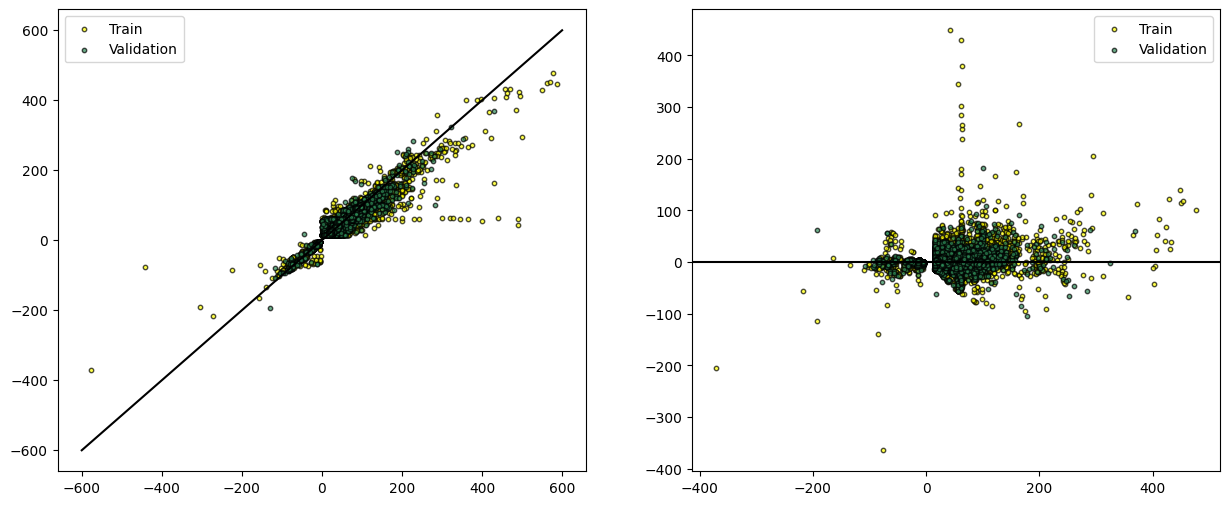

In [54]:
#actual vs predicted plot

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_rf,s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_val,y_pred_rf_t,s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.plot(np.linspace(-600,600),np.linspace(-600,600),color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Actual")
#plt.ylabel("Predicted")


#residual plot
plt.subplot(1,2,2)
plt.scatter(y_pred_rf,(y_train.values.reshape(1,-1)-y_pred_rf),s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_pred_rf_t,(y_val.values.reshape(1,-1)-y_pred_rf_t),s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.axhline(color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Residual")
#plt.ylabel("Predicted")


# 10. ExtraTreesRegressor 3️⃣

### 10.1 Feature Selection and HPT
> We follow the same procedure as was done for the RandomForestRegressor.

In [55]:
#ROUND 1
#param_et = {
 #   "n_features_to_select": [24, 25, 26, 27, 28, 29, 30],
  #  "estimator__min_impurity_decrease":[1e-5,1e-4,0]
   # "estimator__max_depth": randint(5, 7),
    #"estimator__max_features": [0.5,0.6, 0.7]
#}


#et_rfe = RFE(estimator=et_reg)# define the RFE estimator with et_reg as the base estimator
#et_rs = RandomizedSearchCV(et_rfe, param_distributions=param_et, n_iter=10, scoring="r2", n_jobs=-1,verbose=2)
#best_parm={'estimator__max_depth': 6, 'estimator__max_features': 0.7, 'estimator__min_impurity_decrease': 0.0001, 'n_features_to_select': 25}

#ROUND 2- Manuel


In [56]:
et_reg.fit(data_train,np.ravel(y_train))
feature_imp_et=et_reg.feature_importances_
feature_imp_et_df=pd.DataFrame({"Features":data_train.columns,"Importance":feature_imp_et}).sort_values(by="Importance",ascending=False)
feature_imp_et_df

,Features,Importance
25,remainder__trip_distance,0.303857
4,cat_pipe__RatecodeID_1.0,0.275659
2,num_1__Airport_fee,0.091697
28,remainder__tolls_amount,0.085791
29,remainder__improvement_surcharge,0.079662
27,remainder__tip_amount,0.072745
9,cat_pipe__RatecodeID_99.0,0.018597
30,remainder__pickup_hour,0.009643
26,remainder__extra,0.008552
5,cat_pipe__RatecodeID_2.0,0.007711


### 10.2 Prediction using the Model

In [57]:
#we fit the model for the best parameters
selected_features_et=feature_imp_et_df.iloc[:26,0]
et_reg.set_params(max_depth=7,max_features= 0.7,min_impurity_decrease=0.0001,n_estimators=500)
et_reg.fit(data_train[selected_features_et],np.ravel(y_train))

#prediction -train data
y_pred_et=et_reg.predict(data_train[selected_features_et])
r2_train_et=r2_score(y_train,y_pred_et)
print(f"train score: {r2_train_et}")

#prediction-validation_data
y_pred_et_t=et_reg.predict(data_val[selected_features_et])
r2_val_et=r2_score(y_val,y_pred_et_t)
print(f"test score: {r2_val_et}")


train score: 0.8872576214310827
test score: 0.9000621987887553


### 10.3 Model Evaluation

In [58]:
cv_et = cross_val_score(et_reg, data_train[selected_features_et],np.ravel(y_train), cv=5,scoring='r2')
print(f"cv-scores: {cv_et}")
print(f"Mean 5-Fold R Squared: {np.mean(cv_et)}\nstdev 5-Fold R Squared: {np.std(cv_et)}")

cv-scores: [0.87771703 0.88935745 0.87703606 0.8613627  0.89600417]
Mean 5-Fold R Squared: 0.880295484906742
stdev 5-Fold R Squared: 0.011871011144192322


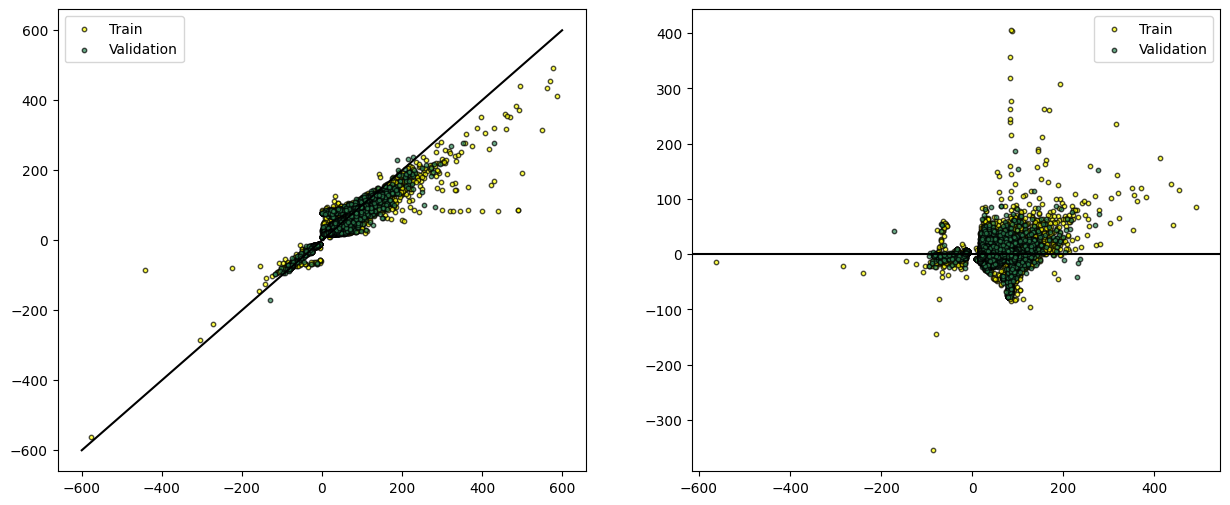

In [59]:
#actual vs predicted plot

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_et,s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_val,y_pred_et_t,s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.plot(np.linspace(-600,600),np.linspace(-600,600),color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Actual")
#plt.ylabel("Predicted")


#residual plot
plt.subplot(1,2,2)
plt.scatter(y_pred_et,(y_train.values.reshape(1,-1)-y_pred_et),s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_pred_et_t,(y_val.values.reshape(1,-1)-y_pred_et_t),s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.axhline(color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Residual")
#plt.ylabel("Predicted")

# 11. GradientBoostingRegressor 4️⃣

### 11.1 Feature Selection and HPT


> For choosing the bet features, we use RFE. The hyperparameters are tuned via RandomizedSearchCV.

In [60]:
#RFE for feature selection

#set the parameter grid
#param_gb={"n_features_to_select":[24,25,26,27,28,29]}

#call the RFE
#rfe_gb=RFE(gb_reg)
#gs_gb=GridSearchCV(rfe_gb,param_gb,scoring="r2",cv=5,n_jobs=-1)
#gs_gb.fit(data_train,np.ravel(y_train))


In [61]:
#selected_features_gb =(data_train.columns)[gs_gb.best_estimator_.support_]
# a total of 28 features has been chosen
selected_features_gb=['num_1__passenger_count', 'num_1__congestion_surcharge',
       'num_1__Airport_fee', 'num_1__travel_time_sec',
       'cat_pipe__RatecodeID_1.0', 'cat_pipe__RatecodeID_2.0',
       'cat_pipe__RatecodeID_3.0', 'cat_pipe__RatecodeID_4.0',
       'cat_pipe__RatecodeID_5.0', 'cat_pipe__RatecodeID_99.0',
       'ord_1__weekend/weekday', 'oh1__VendorID_0', 'oh1__VendorID_1',
       'oh1__VendorID_2', 'oh1__day_Friday', 'oh1__day_Saturday',
       'oh1__day_Thursday', 'oh1__day_Wednesday', 'oh1__payment_type_Cash',
       'oh1__payment_type_Credit Card', 'oh1__payment_type_UPI',
       'oh1__payment_type_Wallet', 'remainder__trip_distance',
       'remainder__extra', 'remainder__tip_amount', 'remainder__tolls_amount',
       'remainder__improvement_surcharge', 'remainder__pickup_hour']

In [62]:
#param_gb={"learning_rate":loguniform(0.1,0.2),"n_estimators":randint(200,350),"max_depth":[3,4,5]}
#rs_gb=RandomizedSearchCV(gb_reg,param_gb,n_iter=10,cv=5,scoring="r2",random_state=1)
#rs_gb.fit(data_train[selected_features_gb],np.ravel(y_train))
#print(rs_gb.best_params_)

In [63]:
#Tune the HPT using RandomizedSearchCV and manuel adjustments

##ROUND 1
#param_gb={"learning_rate":loguniform(0.1,0.2),"n_estimators":randint(200,350),"max_depth":[3,4,5]}
#rs_gb=RandomizedSearchCV(gb_reg,param_gb,n_iter=10,cv=5,scoring="r2",random_state=1)

#BEST PARAMS: {'learning_rate': 0.12706447434571105, 'max_depth': 5, 'n_estimators': 225}
#train score: 0.9747775627340232
#test score: 0.963275087148321
#Mean 5-Fold R Squared: 0.9455877559258454
#stdev 5-Fold R Squared: 0.010599067155908446

##ROUND 2


### 11.2 Prediction using the Model

In [64]:
#we fit the model for the best parameters
gb_reg.set_params(max_depth=5,learning_rate=0.12706447434571105,n_estimators=225)
gb_reg.fit(data_train[selected_features_gb],np.ravel(y_train))

#prediction -train data
y_pred_gb=gb_reg.predict(data_train[selected_features_gb])
r2_train_gb=r2_score(y_train,y_pred_gb)
print(f"train score: {r2_train_gb}")

#prediction-validation_data
y_pred_gb_t=gb_reg.predict(data_val[selected_features_gb])
r2_val_gb=r2_score(y_val,y_pred_gb_t)
print(f"test score: {r2_val_gb}")


train score: 0.9747775627340232
test score: 0.963275087148321


### 11.3 Model Evaluation

In [65]:
cv_gb = cross_val_score(gb_reg, data_train[selected_features_gb],np.ravel(y_train), cv=5,scoring='r2')
print(f"cv-scores: {cv_gb}")
print(f"Mean 5-Fold R Squared: {np.mean(cv_gb)}\nstdev 5-Fold R Squared: {np.std(cv_gb)}")

cv-scores: [0.9426356  0.94863865 0.94743239 0.92820895 0.96102319]
Mean 5-Fold R Squared: 0.9455877559258454
stdev 5-Fold R Squared: 0.010599067155908446


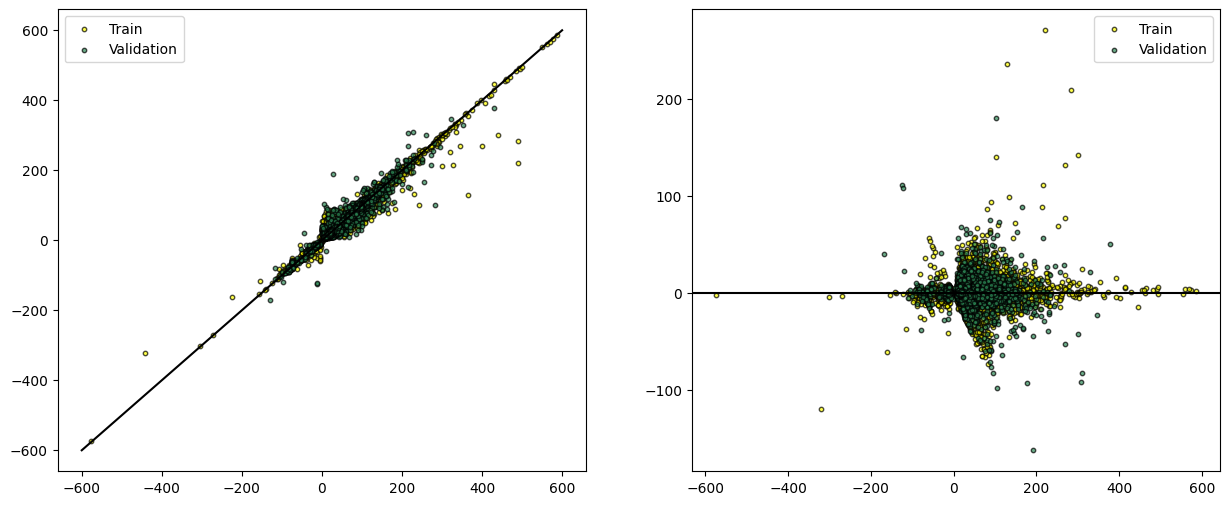

In [66]:
#actual vs predicted plot

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_gb,s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_val,y_pred_gb_t,s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.plot(np.linspace(-600,600),np.linspace(-600,600),color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Actual")
#plt.ylabel("Predicted")


#residual plot
plt.subplot(1,2,2)
plt.scatter(y_pred_gb,(y_train.values.reshape(1,-1)-y_pred_gb),s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_pred_gb_t,(y_val.values.reshape(1,-1)-y_pred_gb_t),s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.axhline(color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Residual")
#plt.ylabel("Predicted")

# 12. LightGradientBoost 5️⃣

> Here too we use RFE to selecet the features under the default lgb parameter setting. After which the best parameters are tuned using RandomizedSearchCV

### 12.1 Feature Selection and HPT

In [67]:
#RFE for feature selection

#set the parameter grid
#param_lgb={"n_features_to_select":[24,25,26,27,28,29]}

#call the RFE
#rfe_lgb=RFE(lgb_reg)
#gs_lgb=GridSearchCV(rfe_lgb,param_lgb,scoring="r2",cv=5,n_jobs=-1)
#gs_lgb.fit(data_train,np.ravel(y_train))


In [68]:
#GridSearchCV gave 25 as the best no: of features
#selected_features_lgb=(data_train.columns)[gs_lgb.best_estimator_.support_])
selected_features_lgb=['num_1__passenger_count', 'num_1__congestion_surcharge','num_1__Airport_fee', 'num_1__travel_time_sec','cat_pipe__RatecodeID_1.0',
                       'cat_pipe__RatecodeID_2.0','cat_pipe__RatecodeID_3.0', 'cat_pipe__RatecodeID_4.0',
                       'cat_pipe__RatecodeID_5.0', 'cat_pipe__RatecodeID_99.0','oh1__VendorID_0', 'oh1__VendorID_1',
                       'oh1__day_Friday','oh1__day_Thursday', 'oh1__day_Wednesday', 'oh1__payment_type_Cash',
                       'oh1__payment_type_Credit Card', 'oh1__payment_type_UPI','oh1__payment_type_Wallet', 'remainder__trip_distance','remainder__extra', 'remainder__tip_amount',
                       'remainder__tolls_amount','remainder__improvement_surcharge', 'remainder__pickup_hour']


In [69]:
#randomized search to hypertune the parameters of lgb
#param_lgb={"learning_rate":loguniform(0.1,0.2),"n_estimators":randint(200,350),"max_depth":[3,4,5]}
#rs_lgb=RandomizedSearchCV(lgb_reg,param_lgb,n_iter=10,cv=5,scoring="r2",random_state=1)
#rs_lgb.fit(data_train[selected_features_lgb],np.ravel(y_train))
#print(rs_lgb.best_params_)

In [70]:
#ROUND 1
##param_lgb={"learning_rate":loguniform(0.1,0.2),"n_estimators":randint(200,350),"max_depth":[3,4,5]}
##rs_lgb=RandomizedSearchCV(lgb_reg,param_lgb,n_iter=10,cv=5,scoring="r2",random_state=1)

###Best Params: {'learning_rate': 0.14527804906948857, 'max_depth': 5, 'n_estimators': 301}

### 12.2 Prediction Using the Model

In [71]:
#prediction using train
lgb_reg.set_params(learning_rate= 0.14527804906948857, max_depth=5, n_estimators= 301)
lgb_reg.fit(data_train[selected_features_lgb],np.ravel(y_train))
#prediction -train data
y_pred_lgb=lgb_reg.predict(data_train[selected_features_lgb])
r2_train_lgb=r2_score(y_train,y_pred_lgb)
print(f"train score: {r2_train_lgb}")

#prediction-validation_data
y_pred_lgb_t=lgb_reg.predict(data_val[selected_features_lgb])
r2_val_lgb=r2_score(y_val,y_pred_lgb_t)
print(f"test score: {r2_val_lgb}")

train score: 0.9621856897959815
test score: 0.9517774559982298


### 12.3 Model Evaluation

In [72]:
cv_lgb = cross_val_score(lgb_reg, data_train[selected_features_lgb],np.ravel(y_train), cv=5,scoring='r2')
print(f"cv-scores: {cv_lgb}")
print(f"Mean 5-Fold R Squared: {np.mean(cv_lgb)}\nstdev 5-Fold R Squared: {np.std(cv_lgb)}")

cv-scores: [0.92820674 0.92324424 0.93473775 0.89886481 0.94552209]
Mean 5-Fold R Squared: 0.9261151268409892
stdev 5-Fold R Squared: 0.015531749634482507


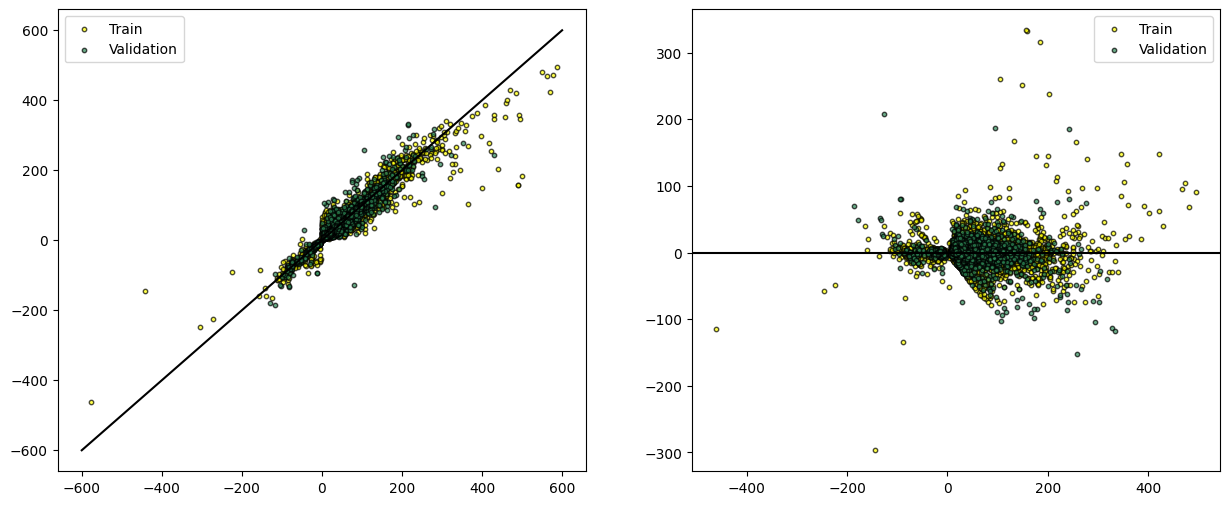

In [73]:
#actual vs predicted plot

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_lgb,s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_val,y_pred_lgb_t,s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.plot(np.linspace(-600,600),np.linspace(-600,600),color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Actual")
#plt.ylabel("Predicted")


#residual plot
plt.subplot(1,2,2)
plt.scatter(y_pred_lgb,(y_train.values.reshape(1,-1)-y_pred_lgb),s=10,color="yellow",alpha=0.7,edgecolor="black")
plt.scatter(y_pred_lgb_t,(y_val.values.reshape(1,-1)-y_pred_lgb_t),s=10,color="seagreen",alpha=0.7,edgecolor="black")
plt.axhline(color="black")
plt.legend(["Train","Validation"]);
#plt.xlabel("Residual")
#plt.ylabel("Predicted")

# 13. Submission 🏁

> The comaparions of scores between the 5 models is shown below:

> **XGBOOST Regressor** 1️⃣

> Train score: **0.9716**

> Test score: **0.96549**

> CV score: **0.9457**

> CV standard deviation: **0.0109**



> **RandomForest Regressor** 4️⃣

> Train score: **0.92497**

> Test score: **0.93915**

> CV score: **0.916**

> CV standard deviation: **0.0123**


> **ExtraTrees Regressor** 5️⃣

> Train score: **0.8872**

> Test score: **0.9**

> CV score: **0.880**

> CV standard deviation: **0.0118**


> **GradientBoost Regressor** 2️⃣

> Train score: **0.974**

> Test score: **0.963**

> CV score: **0.945**

> CV standard deviation: **0.0105**


> **LightGradientBoost Regressor** 3️⃣

> Train score: **0.962**

> Test score: **0.951**

> CV score: **0.926**

> CV standard deviation: **0.01553**


> From the above comparisons, we see that the boosting alogorithms perform better than the bagging algorithms. This is expected as each weak learner is created by taking in accoun the residuals.


> Next steps
> Further hyper parameter tuning could improve the performance further. Especially in gradientboost regressor.
> Further feature engineering could also be attempted.




In [74]:
# applying the preprocessing on the train and test set
train_original=prep.fit_transform(train_copy)
test_original=prep.transform(test_copy)
train_=train_original[selected_features_xgb]
test_=test_original[selected_features_xgb]
y=train["total_amount"]

In [75]:
#fitting and prediciting on the entire train and test data
xgb_final=xgb.XGBRegressor(max_depth=5,learning_rate=0.101003,n_estimators=285,random_state=1)
xgb_final.fit(train_,y)
ypred_xgb_final=xgb_final.predict(test_)


In [76]:
#creating the ID column
ID=list(range(1,test_.shape[0]+1))
position=0
test_.insert(position,'ID',ID)

In [77]:
#create the submission csv
my_submission = pd.DataFrame({'ID': test_.ID, 'total_amount': ypred_xgb_final})
my_submission.to_csv('submission.csv', index=False)


In [78]:
my_submission.head(20)

,ID,total_amount
0,1,32.895779
1,2,25.156801
2,3,15.629728
3,4,15.228388
4,5,26.730934
5,6,13.145419
6,7,121.344360
7,8,24.116722
8,9,16.677181
9,10,14.356058


# **THANK YOU**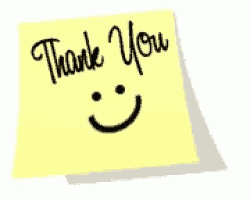